In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#1
df = pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#2.1, 2.13
df.replace(' ?', np.NaN, inplace=True)
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


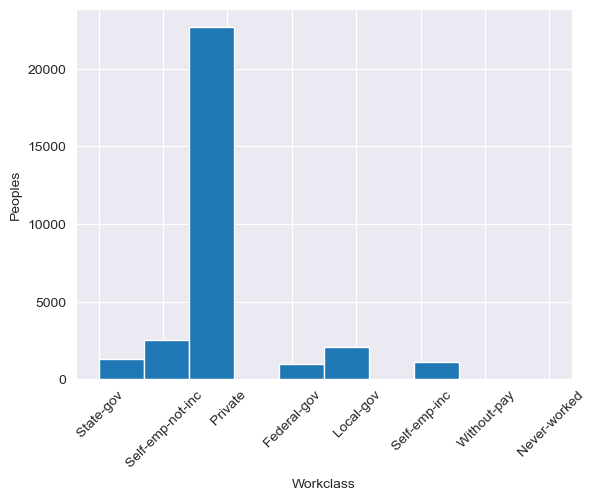

In [4]:
#2.2
df['workclass'].hist(xrot=45)
plt.xlabel('Workclass')
plt.ylabel("Peoples")
print(df["workclass"].value_counts())

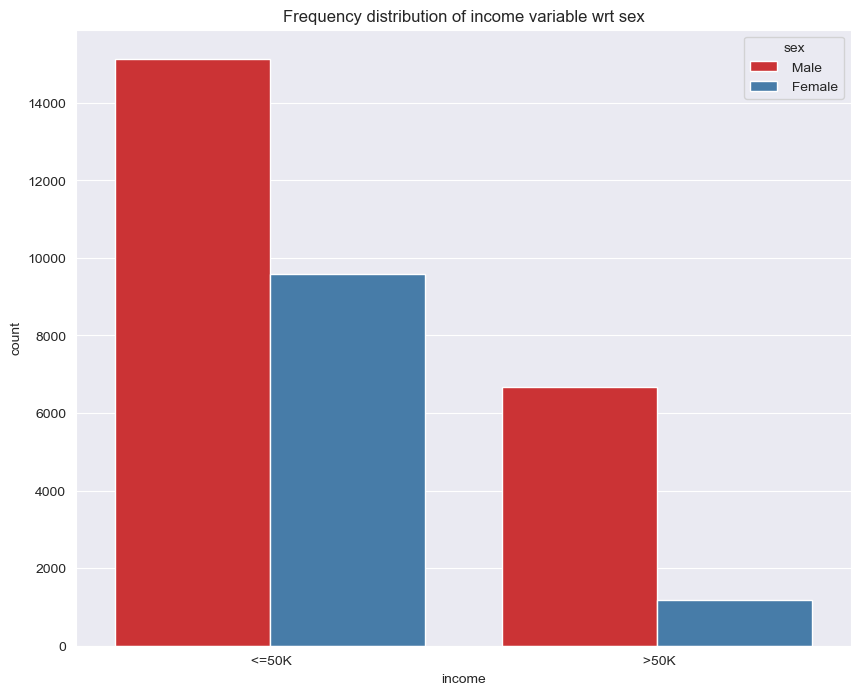

In [5]:
#2.3
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

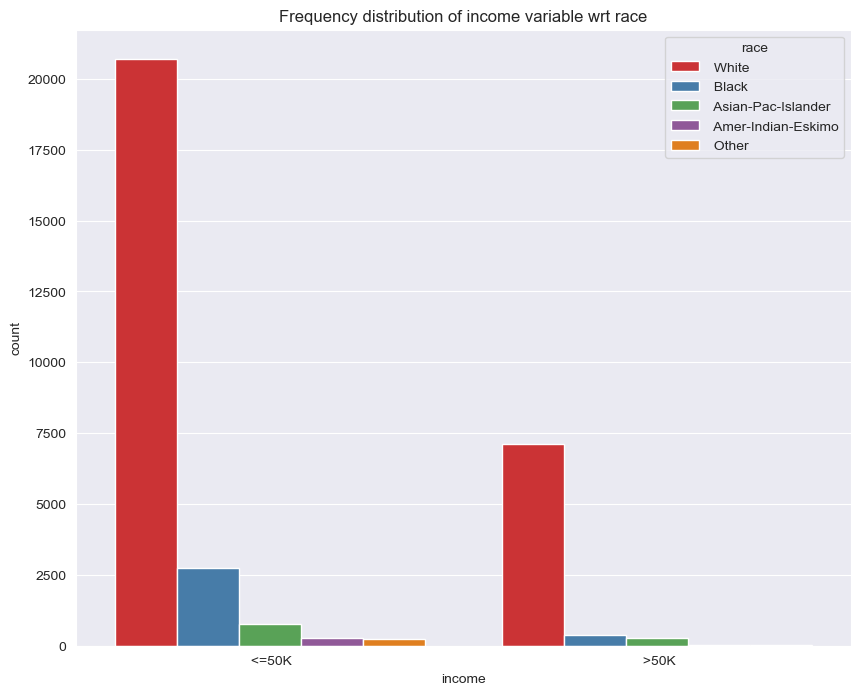

In [6]:
#2.4
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

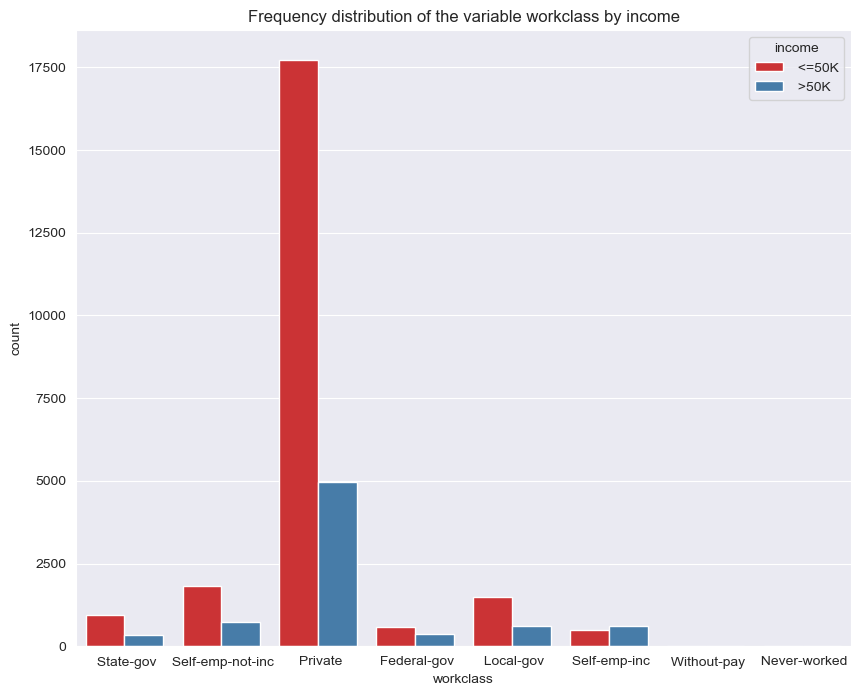

In [7]:
#2.5
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of the variable workclass by income")
plt.show()

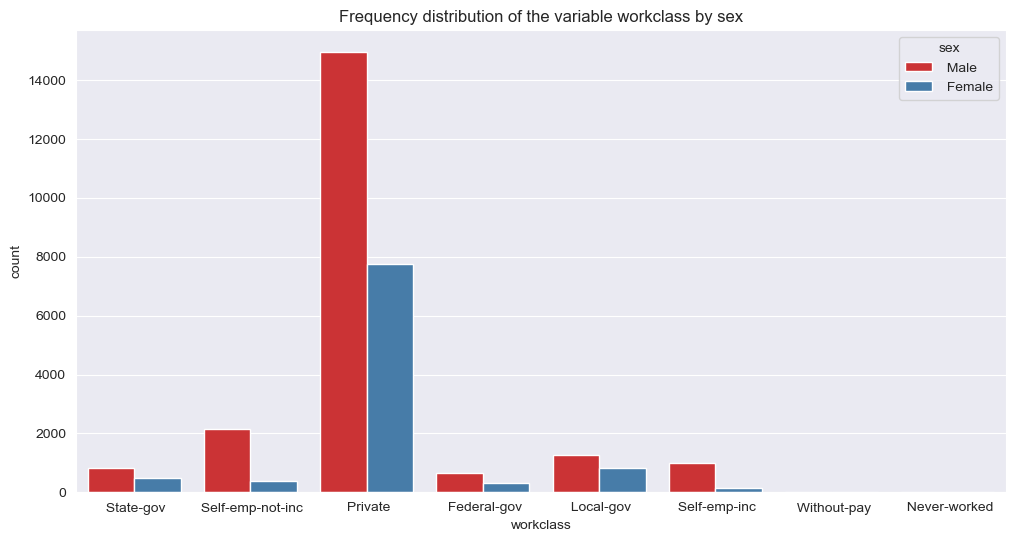

In [8]:
#2.6
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of the variable workclass by sex")
plt.show()

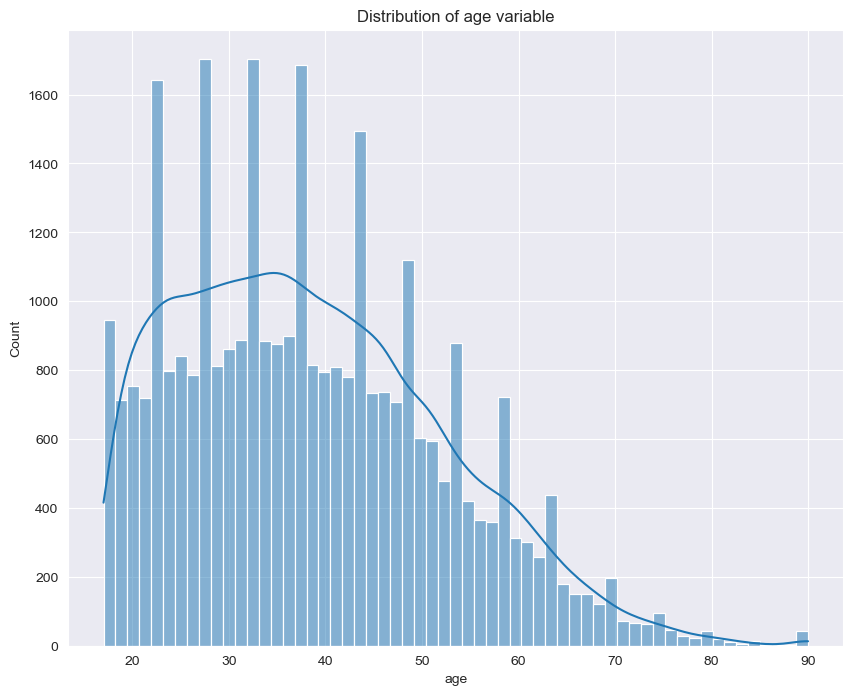

In [9]:
#2.7
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.histplot(df['age'], kde=True)
ax.set_title("Distribution of age variable")
plt.show()

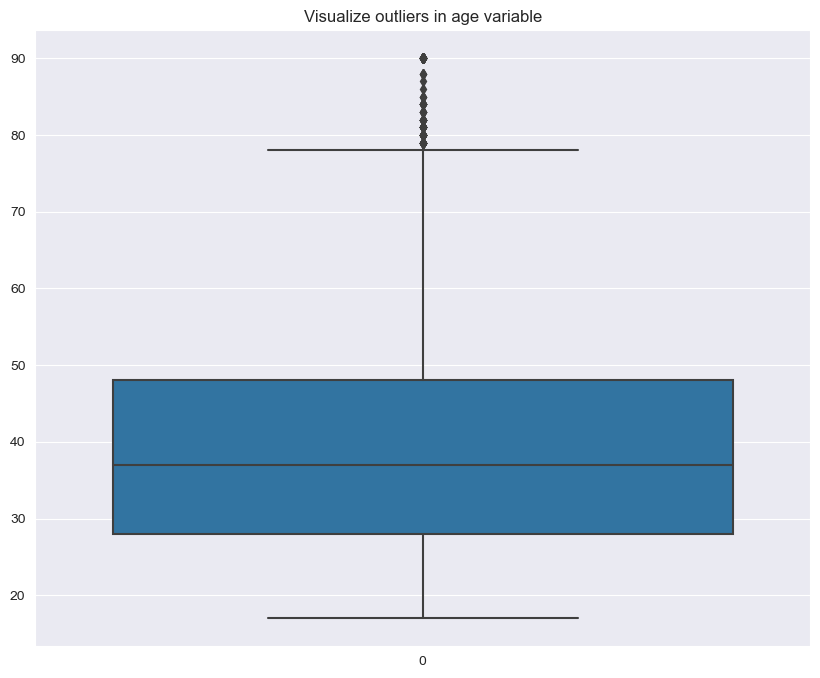

In [10]:
#2.8
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(df['age'])
ax.set_title("Visualize outliers in age variable")
plt.show()

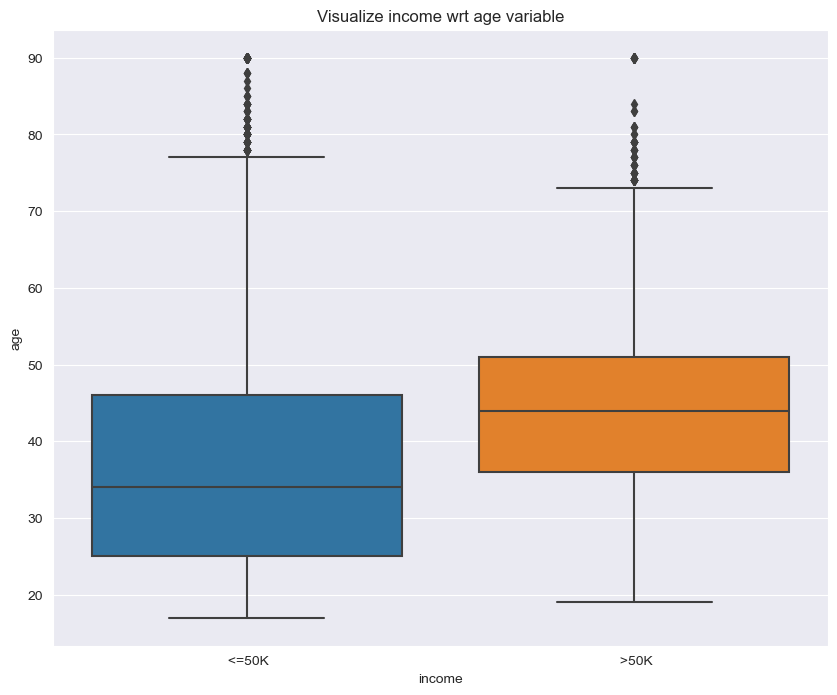

In [11]:
#2.9
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

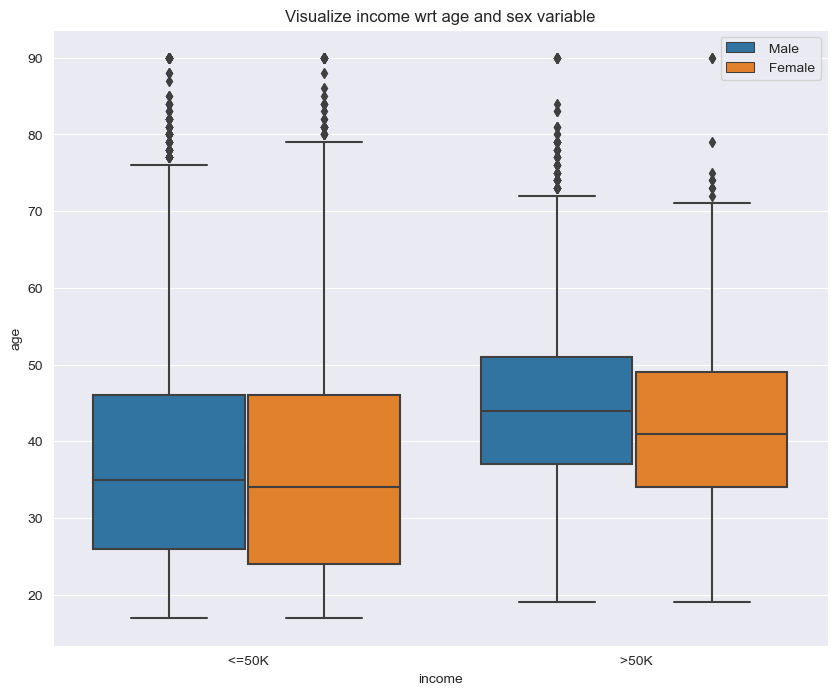

In [12]:
#2.10
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

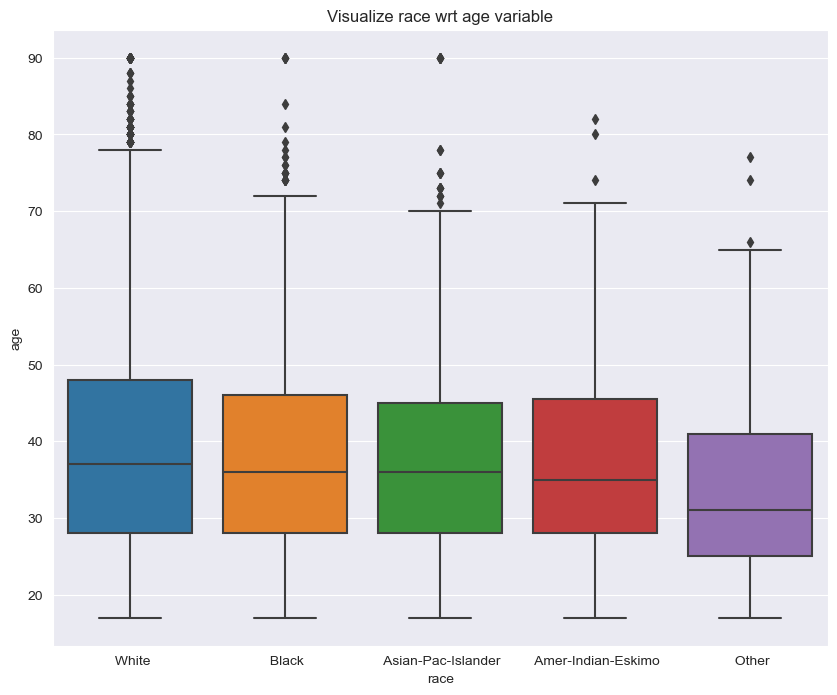

In [13]:
#2.11
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="race", y="age", data=df)
ax.set_title("Visualize race wrt age variable")
plt.show()

In [14]:
#2.12
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


In [15]:
#2.14
categorical = [var for var in df.columns if df[var].dtype == 'O']
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [16]:
#2.15
numbers = [var for var in df.columns if df[var].dtype != 'O']
df[numbers].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [18]:
#3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=(['income'])), df["income"], test_size=0.33)

D:\Program Files\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Артур\AppData\Local\Temp\ipykernel_3784\1229958611.py:14: RuntimeWarning: invalid value encountered in double_scalars
  F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train,
D:\Program Files\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 du

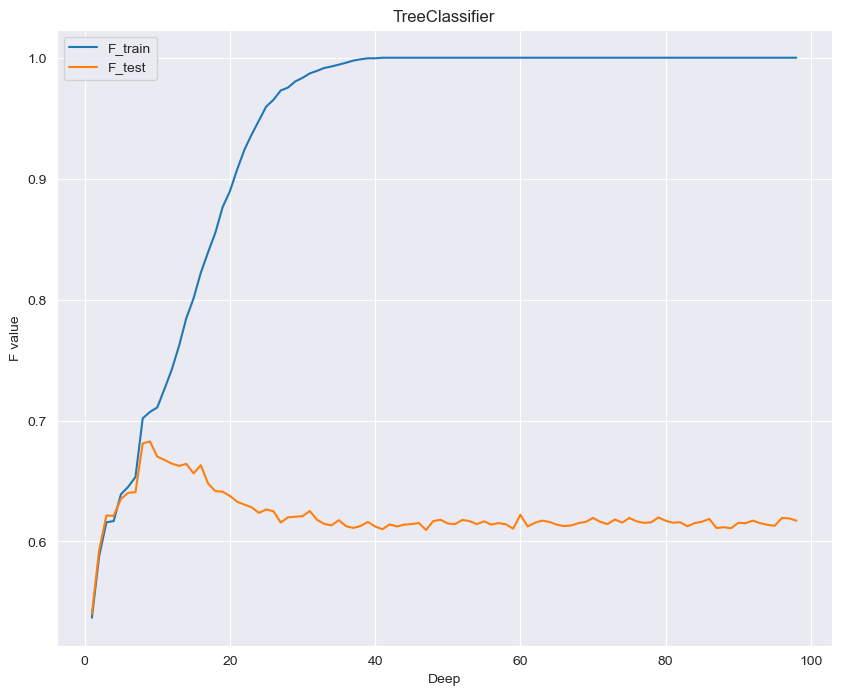

Наилучшая глубина дерева -  10 , с F-мерой  0.6827105763141229


,predicted >50K,predicted <=50K
actual >50K,7622,621
actual <=50K,885,1618


In [19]:
#4
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

train_F = []
test_F = []
best_F = 0
best_deep = 0

for mxd in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=mxd)
    clf.fit(X_train, y_train)
    y_train_predict = clf.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train,
                                                                                            y_train_predict)) / (
                      metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train,
                                                                                               y_train_predict))
    train_F.append(F_train)
    y_test_predict = clf.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict)) / (
            metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F.append(F_test)
    if F_test > best_F:
        best_F = F_test
        best_deep = mxd

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("TreeClassifier")
ax.set_xlabel("Deep")
ax.set_ylabel("F value")
ax.legend()
plt.show()

print('Наилучшая глубина дерева - ', best_deep, ', с F-мерой ', best_F)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_deep)
clf.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(data=confusion_matrix, columns=['predicted >50K', 'predicted <=50K'],
             index=['actual >50K', 'actual <=50K'])

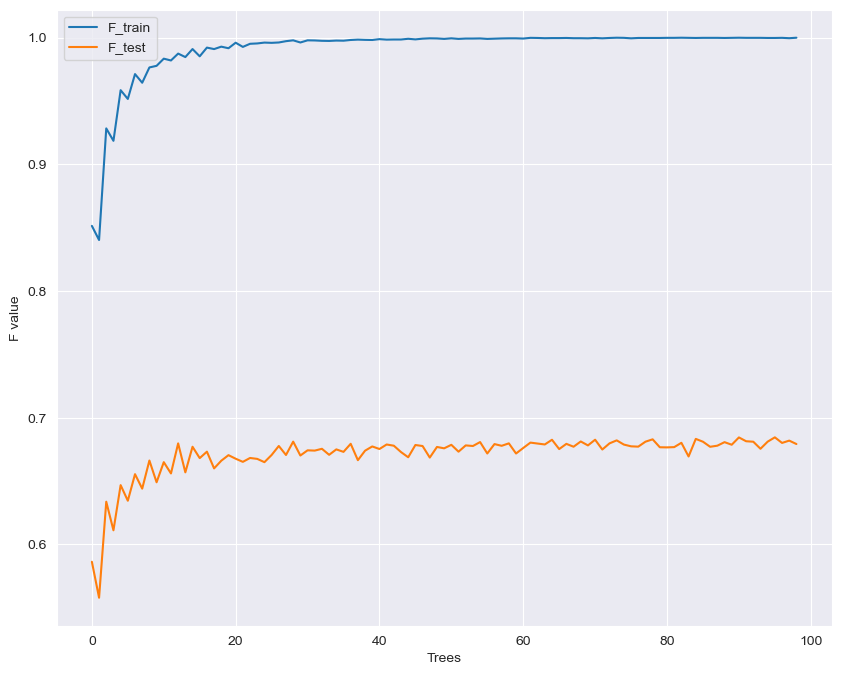

Наилучшее количество деревьев -  96 , с с F-мерой  0.6845432744713321


,predicted >50K,predicted <=50K
actual >50K,7726,517
actual <=50K,956,1547


In [20]:
#5
from sklearn.ensemble import RandomForestClassifier

train_F = []
test_F = []
best_F = 0
best_deep = 0

for t in range(1, 100):
    forest = RandomForestClassifier(n_estimators=t)
    forest.fit(X_train, y_train)
    y_train_predict = forest.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train,
                                                                                            y_train_predict)) / (
                      metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train,
                                                                                               y_train_predict))
    train_F.append(F_train)
    y_test_predict = forest.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict)) / (
            metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F.append(F_test)
    if (F_test > best_F):
        best_F = F_test
        best_deep = t

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_xlabel("Trees")
ax.set_ylabel("F value")
ax.legend()
plt.show()

print('Наилучшее количество деревьев - ', best_deep, ', с с F-мерой ', best_F)

forest = RandomForestClassifier(n_estimators=best_deep)
forest.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, forest.predict(X_test))
pd.DataFrame(data=confusion_matrix, columns=['predicted >50K', 'predicted <=50K'],
             index=['actual >50K', 'actual <=50K'])


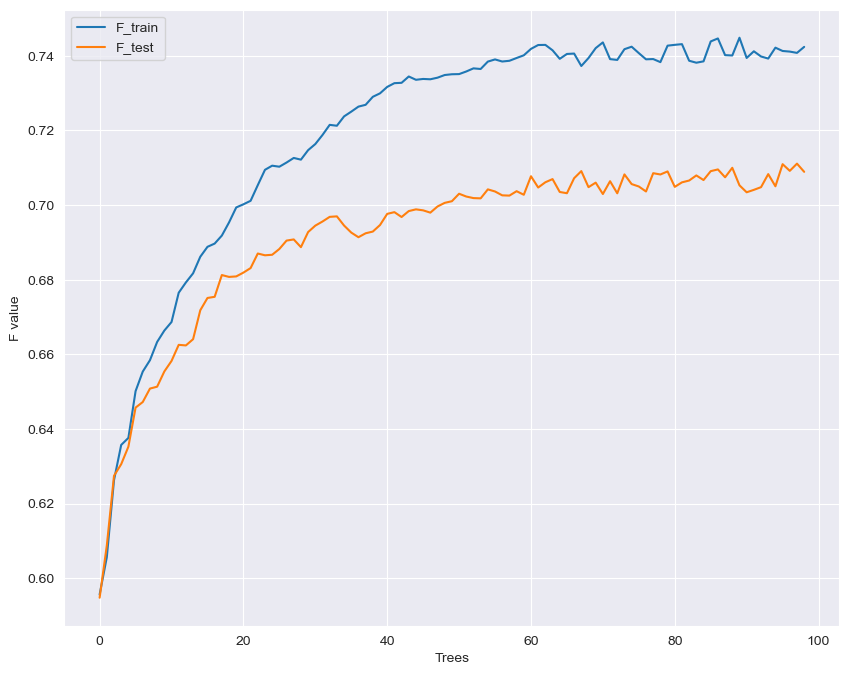

Наилучшее количество деревьев -  98 , с F-мерой  0.7111013986013986


,predicted >50K,predicted <=50K
actual >50K,7797,446
actual <=50K,876,1627


In [21]:
#6
from catboost import CatBoostClassifier

train_F = []
test_F = []
best_F = 0
best_deep = 0

for b in range(1, 100):
    cat = CatBoostClassifier(loss_function='Logloss', n_estimators=b)
    cat.fit(X_train, y_train, verbose=False)
    y_train_predict = cat.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train,
                                                                                            y_train_predict)) / (
                      metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train,
                                                                                               y_train_predict))
    train_F.append(F_train)
    y_test_predict = cat.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict)) / (
            metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F.append(F_test)
    if F_test > best_F:
        best_F = F_test
        best_deep = b

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_xlabel("Trees")
ax.set_ylabel("F value")
ax.legend()
plt.show()

print('Наилучшее количество деревьев - ', best_deep, ', с F-мерой ', best_F)

# Построим матрицу ошибок для леса с оптимальным количеством деревьев
cat = CatBoostClassifier(n_estimators=best_deep)
cat.fit(X_train, y_train, verbose=False)
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
pd.DataFrame(data=confusion_matrix, columns=['predicted >50K', 'predicted <=50K'],
             index=['actual >50K', 'actual <=50K'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                480       
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 activation_5 (Activation)   (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 activation_6 (Activation)   (None, 8)                

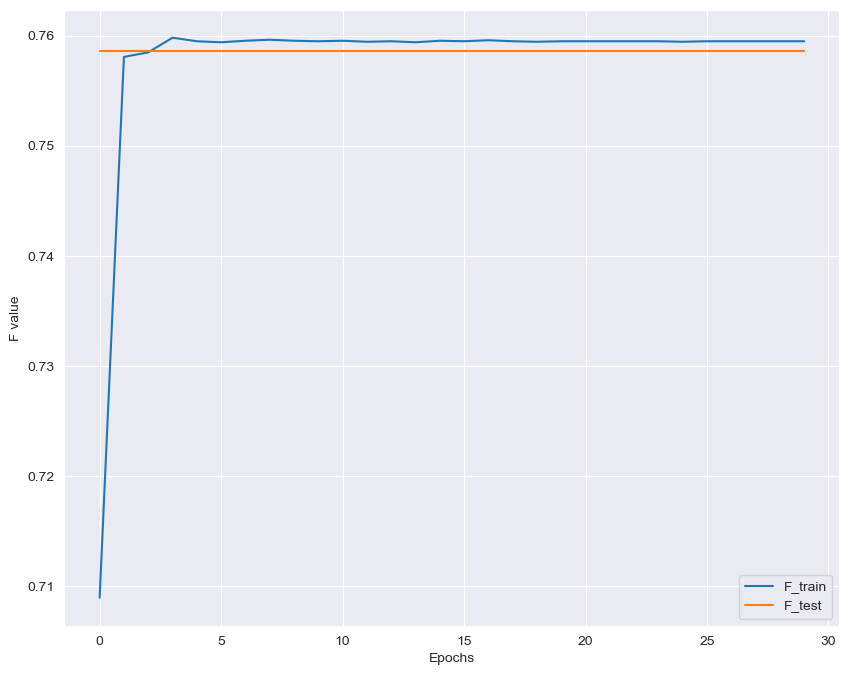

Наилучшая F-мера  0.7586078643798828
336/336 [==============================] - 1s 1ms/step
Epoch 1/30
682/682 [==============================] - 2s 3ms/step - loss: 0.5517 - precision: 0.7595 - recall: 0.7595 - val_loss: 0.5527 - val_precision: 0.7586 - val_recall: 0.7586
Epoch 2/30
682/682 [==============================] - 2s 3ms/step - loss: 0.5516 - precision: 0.7595 - recall: 0.7595 - val_loss: 0.5527 - val_precision: 0.7586 - val_recall: 0.7586
Epoch 3/30
682/682 [==============================] - 2s 3ms/step - loss: 0.5546 - precision: 0.7595 - recall: 0.7595 - val_loss: 0.5527 - val_precision: 0.7586 - val_recall: 0.7586
Epoch 4/30
682/682 [==============================] - 2s 3ms/step - loss: 0.5517 - precision: 0.7595 - recall: 0.7595 - val_loss: 0.5527 - val_precision: 0.7586 - val_recall: 0.7586
Epoch 5/30
682/682 [==============================] - 2s 3ms/step - loss: 0.5545 - precision: 0.7596 - recall: 0.7596 - val_loss: 0.5527 - val_precision: 0.7586 - val_recall: 0.758

,predicted >50K,predicted <=50K
actual >50K,8152,0
actual <=50K,2594,0


In [24]:
#7
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

y = df["income"]
X = df.drop(columns=(['income']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
best_F = 0
index_best_F = 0
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
X_train = X_train.to_numpy(dtype=('float32'))
X_test = X_test.to_numpy(dtype=('float32'))
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=EPOCHS, verbose=1, validation_data=(X_test, y_test))
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    f1_score_list_train.append(2 * history.history['precision'][i] *
                               history.history['recall'][i] / (history.history['precision'][i] +
                                                               history.history['recall'][i]))
    f1_score_list_test.append(2 * history.history['val_precision'][i] *
                              history.history['val_recall'][i] / (history.history['val_precision'][i] +
                                                                  history.history['val_recall'][i]))
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_xlabel("Epochs")
ax.set_ylabel("F value")
ax.legend()
plt.show()

print('Наилучшая F-мера ', best_F)

y_predict = np.argmax(model.predict(X_test), axis=-1)
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, y_test))
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict)
pd.DataFrame(data=confusion_matrix, columns=['predicted >50K', 'predicted <=50K'],
             index=['actual >50K', 'actual <=50K'])


In [ ]:
# 8.1
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# 8.1
train_F = []
test_F = []
best_F = 0
best_deep = 0

for b in range(1, 5):
    cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators=b, logging_level=None)
    cat.fit(X_train, y_train)
    y_train_predict = cat.predict(X_train)
    F_train = f1_score(y_train, cat.predict(X_train), average='micro')
    train_F.append(F_train)
    y_test_predict = cat.predict(X_test)
    F_test = f1_score(y_test, cat.predict(X_test), average='micro')
    test_F.append(F_test)
    if (F_test > best_F):
        best_F = F_test
        best_deep = b

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_xlabel("Trees")
ax.set_ylabel("F value")
ax.legend()
plt.show()

print('Наилучшее количество деревьев - ', best_deep, ', с F-метрикой ', best_F)


cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators=best_deep, logging_level=None)
cat.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
confusion_matrix = pd.DataFrame(data=confusion_matrix, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                                index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")


In [ ]:
# 8.2
t0 = time()
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0
# Заполним пропущенные значения в данных. Сделаем это, выбрав наиболее часто встречающиеся значения признаков в качестве замены
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
# Для обучения нейронной сети преобразуем векторы ответов
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Выберем последовательную модель сборки и соберем архитектуру нейросети
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
# Скомпилируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=EPOCHS, verbose=1, validation_data=(X_test, y_test))
# После обучения считаем значение F-меры
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    if ((history.history['precision'][i] + history.history['recall'][i]) > 0):
        f1_score_list_train.append(2 * history.history['precision'][i] *
                                   history.history['recall'][i] / (history.history['precision'][i] +
                                                                   history.history['recall'][i]))
    else:
        f1_score_list_train.append(0)
    if ((history.history['val_precision'][i] + history.history['val_recall'][
        i]) > 0):  #Вдруг precision и recall равны 0
        f1_score_list_test.append(2 * history.history['val_precision'][i] *
                                  history.history['val_recall'][i] / (history.history['val_precision'][i] +
                                                                      history.history['val_recall'][i]))
    else:
        f1_score_list_test.append(0)
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_title("Neural network")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1 - t0
print('Наилучшая F-мера ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для нейронной сети
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
#Для более наглядной визуализации матрицы ошибок для многоклассового случая можно наложить на нее тепловую карту
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = pd.DataFrame(data=confusion_matrix, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                                index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")